In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import dataset and give columns' names
dataset= pd.read_csv('Concrete_Data.csv')
dataset.columns=["Cement","Blast Furnace Slag","Fly Ash","Water","Superplasticizer","Coarse Aggregate","Fine Aggregate","Age","Concrete compressive strength"]
dataset.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


Feature 0


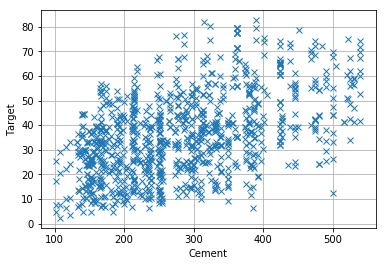

Feature 1


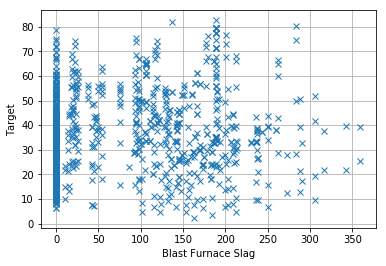

Feature 2


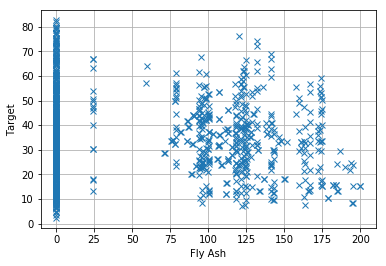

Feature 3


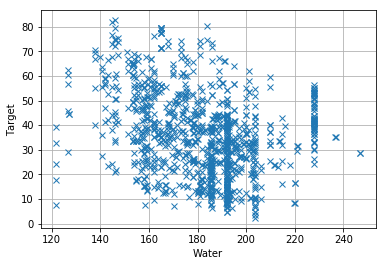

Feature 4


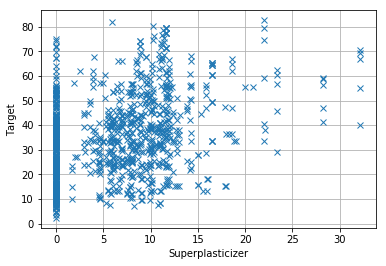

Feature 5


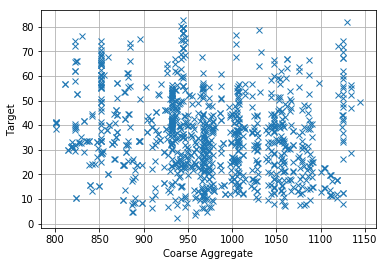

Feature 6


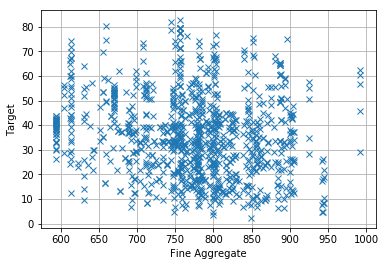

Feature 7


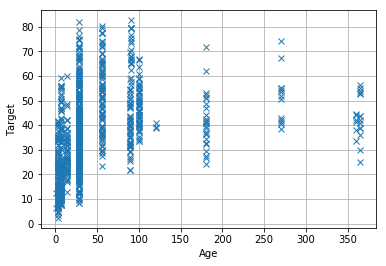

In [3]:
#plot each pair (column,target)
for i in range(dataset.shape[1]-1):
    print("Feature %d" % (i))
    plt.plot(dataset[dataset.columns[i]],dataset[dataset.columns[dataset.shape[1]-1]],'x')
    plt.xlabel(dataset.columns[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()

In [4]:
# Split dataset into (X_train,X_test,y_train,y_test) without shuffle
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
X_train,  X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,shuffle=False)
# Normalize X_train to the range [0,1] and apply normalize to test set (with min,max of the train)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
#Define function for MAPE calculation
def mape(y_true,y_pred):
	y_true,y_pred = np.array(y_true), np.array(y_pred)
	return np.mean(np.abs((y_true-y_pred)/y_true))

In [6]:
# Ordinary Least Squares Linear Regression
#function definition for applying ols and returning error results and coefficients 
def my_ols_regression(X_train,y_train,X_test,y_test):
    lr=lm.LinearRegression().fit(X_train,y_train)
    yhat=lr.predict(X_test)
    mse_ols=np.mean((y_test-yhat)**2)
    mae_ols=np.mean(np.fabs(y_test-yhat))
    my_mape=mape(y_test,yhat)
    return mse_ols,mae_ols,my_mape,lr.coef_

# Run OLS Regression
mse_ols,mae_ols,my_mape,ols_coeff=my_ols_regression(X_train,y_train,X_test,y_test)
# Print results
print('MSE OLS: %f' % mse_ols)
print('MAE OLS: %f' % mae_ols)
print("MAPE OLS: %f" % my_mape)

# Create final model from the entire dataset
lr=lm.LinearRegression().fit(X,y)

MSE OLS: 73.259131
MAE OLS: 6.627384
MAPE OLS: 0.260988


In [7]:
# Ridge Regression
#function definition for applying ridge and returning error results and coefficients
#dataset is already normalized
def my_ridge_regression(X_train,y_train,X_test,y_test,al):
    ridge = lm.Ridge(alpha=al,normalize=False)
    ridge.fit(X_train,y_train)
    yhat=ridge.predict(X_test)
    mse_ridge=np.mean((y_test-yhat)**2)
    mae_ridge=np.mean(np.fabs(y_test-yhat))
    my_mape=mape(y_test,yhat)
    return mse_ridge,mae_ridge,my_mape,ridge.coef_

# Run Ridge Regression for alpha=0.0 (same as ols). Value of alpha will be tested afterwards
mse_ridge,mae_ridge,my_mape,ridge_coef=my_ridge_regression(X_train,y_train,X_test,y_test,0.0)
print('MSE ridge: %f' % (mse_ridge))
print('MAE ridge: %f' % (mae_ridge))
print("MAPE: %f" % my_mape)

MSE ridge: 73.259131
MAE ridge: 6.627384
MAPE: 0.260988


In [8]:
# Lasso Regression
#function definition for applying lasso and returning error results and coefficients 
#dataset is already normalized
def my_lasso(X_train,y_train,X_test,y_test,alpha):
    lasso=lm.Lasso(alpha)
    lasso.fit(X_train,y_train)
    yhat=lasso.predict(X_test)
    mse_lasso=np.mean((y_test-yhat)**2)
    mae_lasso=np.mean(np.fabs(y_test-yhat))
    my_mape=mape(y_test,yhat)
    return mse_lasso,mae_lasso,my_mape,lasso.coef_

# Run Lasso Regression with alpha=0.001. Value of alpha will be tested afterwards
mse_lasso,mae_lasso,my_mape,ridge_coef=my_lasso(X_train,y_train,X_test,y_test,0.001)
print("MSE: %f" % (mse_lasso))
print("MAE: %f" % (mae_lasso))
print("MAPE: %f" % (my_mape))

MSE: 73.258539
MAE: 6.630857
MAPE: 0.261781


MSE for different values of alpha


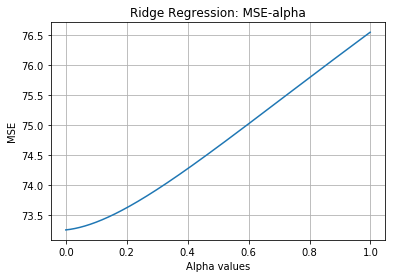

In [9]:
# Test different values of alpha for Ridge Regression (train/test split without shuffling)
# MSE used for evaluation 
mse=[]
mae=[]
mape_val=[]
alpha_values=[]
# store mse,mae,mape for each value of alpha in the range given
for alpha in [x * 0.001 for x in range(0, 1000)]:
    mse_ridge,mae_ridge,my_mape,ridge_coef=my_ridge_regression(X_train,y_train,X_test,y_test,alpha)
    mse.append(mse_ridge)
    mae.append(mae_ridge)
    mape_val.append(my_mape)
    alpha_values.append(alpha)

print("MSE for different values of alpha")
plt.plot(alpha_values,mse)
#plt.plot(alpha_values,mae)
#plt.plot(alpha_values,mape_val)
#plt.legend(['MSE', 'MAE', 'MAPE'], loc='upper left')
plt.title("Ridge Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("MSE")
plt.grid()
plt.savefig('ridge_2.png')
plt.show()


In [10]:
#Run Ridge with selected alpha
mse_ridge,mae_ridge,my_mape,ridge_coef=my_ridge_regression(X_train,y_train,X_test,y_test,0.001)
print('MSE ridge: %f' % (mse_ridge))
print('MAE ridge: %f' % (mae_ridge))
print("MAPE: %f" % my_mape)

MSE ridge: 73.259677
MAE ridge: 6.627546
MAPE: 0.261021


MSE for different values of alpha


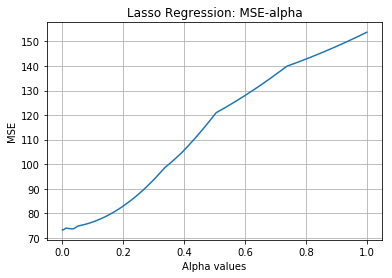

In [11]:
# Test different values of alpha for Lasso Regression
# MSE used for evaluation 
mse=[]
alpha_values=[]
# store mse for each value of alpha in the range given
for alpha in [x * 0.001 for x in range(1, 1000)]:
    mse_lasso,mae_lasso,my_mape,lasso_coef=my_lasso(X_train,y_train,X_test,y_test,alpha)
    mse.append(mse_lasso)
    alpha_values.append(alpha)

print("MSE for different values of alpha")
plt.plot(alpha_values,mse)
plt.title("Lasso Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("MSE")
plt.grid()
plt.savefig('lasso.png')
plt.show()

In [12]:
# Find alpha for min mse and run lasso for this alpha. (range 100:400 because step is 0.1)
ind_min=mse.index(min(mse[1:1000]))
print("Lasso Regression for alpha = %f" % alpha_values[ind_min])

mse_lasso,mae_lasso,my_mape,ridge_coef=my_lasso(X_train,y_train,X_test,y_test,alpha=alpha_values[ind_min])
print("MSE: %f" % (mse_lasso))
print("MAE: %f" % (mae_lasso))
print("MAPE: %f" % (my_mape))

Lasso Regression for alpha = 0.002000
MSE: 73.269907
MAE: 6.634361
MAPE: 0.262575


In [13]:
# random train/test split OLS
np.random.seed(2019)
mse=np.zeros(10)
mae=np.zeros(10)
mape_ar=np.zeros(10)
#tx=1
for rs in range(1,11):
    X_train2,  X_test2,y_train2, y_test2=train_test_split(X,y,test_size=0.3)
    scaler = MinMaxScaler().fit(X_train2)
    X_train2 = scaler.transform(X_train2)
    X_test2= scaler.transform(X_test2)
    mse_ols,mae_ols,mape_ols,ols_coef=my_ols_regression(X_train2,y_train2,X_test2,y_test2)
    mse[rs-1]=mse_ols
    mae[rs-1]=mae_ols
    mape_ar[rs-1]=mape_ols
    
    #print(np.linalg.norm(tx - X_train2))
    #tx= X_train2
#Find mean and std of the errors produced after 10 random splits in dataset
mse_ols_mean=np.mean(mse)
mse_ols_std=np.std(mse)
mae_ols_mean=np.mean(mae)
mae_ols_std=np.std(mae)
mape_ols_mean=np.mean(mape_ar)
mape_ols_std=np.std(mape_ar)
print("OLS mse mean:%f"%mse_ols_mean)
print("OLS mse std:%f"%mse_ols_std)
print("OLS mae mean:%f"%mae_ols_mean)
print("OLS mae std:%f"%mae_ols_std)
print("OLS mape mean:%f"%mape_ols_mean)
print("OLS mape std:%f"%mape_ols_std)
mse

OLS mse mean:109.065674
OLS mse std:6.672293
OLS mae mean:8.281538
OLS mae std:0.287434
OLS mape mean:0.316727
OLS mape std:0.023924


/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data w

array([106.8451204 , 111.9936835 , 120.8987697 , 109.29639452,
       111.30601339, 102.85331599,  94.0845253 , 113.4822067 ,
       108.82940639, 111.06730791])

In [14]:
# random train test/split ridge
np.random.seed(2019)
mse=np.zeros(10)
mae=np.zeros(10)
mape_ar=np.zeros(10)
for rs in range(1,11):
    X_train2,  X_test2,y_train2, y_test2=train_test_split(X,y,test_size=0.3)
    scaler = MinMaxScaler().fit(X_train2)
    X_train2 = scaler.transform(X_train2)
    X_test2= scaler.transform(X_test2)
    mse_ridge,mae_ridge,mape_ridge,ridge_coef=my_ridge_regression(X_train2,y_train2,X_test2,y_test2, 1.0)
    mse[rs-1]=mse_ridge
    mae[rs-1]=mae_ridge
    mape_ar[rs-1]=mape_ridge
#Find mean and std of the errors produced after 10 random splits in dataset
mse_ridge_mean=np.mean(mse)
mse_ridge_std=np.std(mse)
mae_ridge_mean=np.mean(mae)
mae_ridge_std=np.std(mae)
mape_ridge_mean=np.mean(mape_ar)
mape_ridge_std=np.std(mape_ar)
#mapeeeee
print("Ridge mse mean:%f" % mse_ridge_mean)
print("Ridge mse std:%f" % mse_ridge_std)
print("Ridge mae mean:%f" % mae_ridge_mean)
print("Ridge mae std:%f" % mae_ridge_std)
print("Ridge mape mean:%f"%mape_ridge_mean)
print("Ridge mape std:%f"%mape_ridge_std)
mse

Ridge mse mean:109.677903
Ridge mse std:6.400116
Ridge mae mean:8.374348
Ridge mae std:0.272870
Ridge mape mean:0.324672
Ridge mape std:0.025563


/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data w

array([108.59184728, 113.20331135, 120.79343239, 109.56180556,
       112.75387826, 103.46061031,  94.93481515, 110.70457558,
       111.20743787, 111.56731721])

In [15]:
# random train/test split lasso
np.random.seed(2019)
mse=np.zeros(10)
mae=np.zeros(10)
mape_ar=np.zeros(10) #,random_state=rs
for rs in range(1,11):
    X_train2,  X_test2,y_train2, y_test2=train_test_split(X,y,test_size=0.3)
    scaler = MinMaxScaler().fit(X_train2)
    X_train2 = scaler.transform(X_train2)
    X_test2= scaler.transform(X_test2)
    mse_lasso,mae_lasso,mape_lasso,lasso_coef=my_lasso(X_train2,y_train2,X_test2,y_test2,0.001)
    mse[rs-1]=mse_lasso
    mae[rs-1]=mae_lasso
    mape_ar[rs-1]=mape_lasso
#Find mean and std of the errors produced after 10 random splits in dataset
mse_lasso_mean=np.mean(mse)
mse_lasso_std=np.std(mse)
mae_lasso_mean=np.mean(mae)
mae_lasso_std=np.std(mae)
mape_lasso_mean=np.mean(mape_ar)
mape_lasso_std=np.std(mape_ar)
print("Lasso mse mean:%f"%mse_lasso_mean)
print("Lasso mse std:%f"%mse_lasso_std)
print("Lasso mae mean:%f"%mae_lasso_mean)
print("Lasso mae std:%f"%mae_lasso_std)
print("Lasso mape mean:%f"%mape_lasso_mean)
print("Lasso mape std:%f"%mape_lasso_std)
mse

Lasso mse mean:107.972459
Lasso mse std:8.388825
Lasso mae mean:8.220274
Lasso mae std:0.348580
Lasso mape mean:0.312388
Lasso mape std:0.025528


/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data w

array([106.91156906, 119.72175549, 120.83569077, 109.7713341 ,
       110.494844  ,  93.87854217,  95.32177092, 112.06136535,
       105.85582768, 104.87188593])

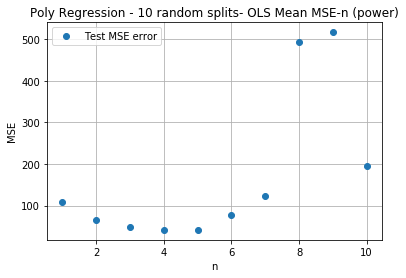

41.60789557183093
Min MSE poly 10 random splits: 4.000000


In [16]:
# Poly regression with 10 random selections of train/test sets
np.random.seed(2019)
X_train_poly=X_train
X_test_poly=X_test
#function definition in order to run ols with different number of powers with 10 random train/test splits of dataset
def test_poly_regression(X,y,n):
    #create dataset of powers of X
    X_poly=X
    for i in range(1,n):
        X_poly=np.append(X_poly, X**(i+1), axis=1)        
    #multiple random tests
    mse=np.zeros(10)
    mae=np.zeros(10)
    mse_train=np.zeros(10)   
    for rs in range(1,11):
        X_train2,  X_test2,y_train2, y_test2=train_test_split(X_poly,y,test_size=0.3)
        mse_ret,mae_ret,my_mape,coef=my_ols_regression(X_train2,y_train2,X_test2,y_test2)
        mse_ret_train,mae_ret_train,my_mape_train,coef_train=my_ols_regression(X_train2,y_train2,X_train2,y_train2)
        mse_train[rs-1]=mse_ret_train
        mse[rs-1]=mse_ret
        mae[rs-1]=mae_ret
    #find means and std of errors of 10 random splits
    mse_mean=np.mean(mse)
    mse_std=np.std(mse)
    mae_mean=np.mean(mae)
    mae_std=np.std(mae)
    mse_mean_train=np.mean(mse_train)
    #print("mse mean:%f"%mse_mean)
    #print("mse std:%f"%mse_std)
    #print("mae mean:%f"%mae_mean)
    #print("mae std:%f"%mae_std)  
    return mse_mean,mse_std,mae_mean,mae_std,mse_mean_train

# run poly regression for each power n
mse_mean=np.zeros(10)
mse_std=np.zeros(10)
mae_mean=np.zeros(10)
mae_std=np.zeros(10)
mse_mean_train=np.zeros(10)
for n in range(1,11):
    mse_mean[n-1],mse_std[n-1],mae_mean[n-1],mae_std[n-1],mse_mean_train[n-1]=test_poly_regression(X,y,n)   
#plot mse for each power and find min index
plt.plot(range(1,11),mse_mean, 'o') #,linestyle='--'
#plt.plot(range(1,11),mse_mean_train, 'x',linestyle='--')
plt.title("Poly Regression - 10 random splits- OLS Mean MSE-n (power)")
plt.xlabel("n")
plt.ylabel("MSE")
plt.legend(["Test MSE error"," Train MSE error"])
plt.grid()
plt.savefig('poly_1.png')
plt.show()
print(min(mse_mean))
ind_min=np.argmin(mse_mean)
print("Min MSE poly 10 random splits: %f" % (ind_min+1))

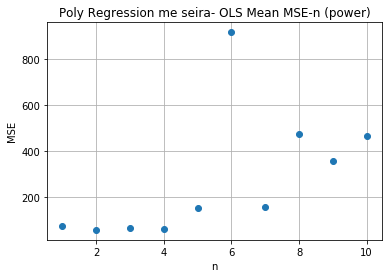

57.66190311900396
Min MSE poly me seira: 2.000000


In [17]:
#poly regression with train/test in order 
#function definition in order to run ols with different number of powers without shuffling dataset
def test_poly_regression_seira(X,X_train_poly,y_train_poly,X_test_poly,y_test_poly,n):
    mse_ret,mae_ret,my_mape,coef=my_ols_regression(X_train_poly,y_train_poly,X_test_poly,y_test_poly)  
    return mse_ret,mae_ret,my_mape

mse_mean=np.zeros(10)
#create the array with X power 1...10
X_poly=X
y_poly=y
for i in range(1,10):
    X_poly=np.append(X_poly, X**(i+1), axis=1)

mse_poly=np.zeros(10)
mae_poly=np.zeros(10)
mape_poly=np.zeros(10)
#split dataset without shuffling
X_train_poly,  X_test_poly,y_train_poly, y_test_poly=train_test_split(X_poly,y_poly,test_size=0.3,shuffle=False)

#run test with different power n and save the mse for each power
for n in range(1,11):
    X_train_poly2=X_train_poly[:,0:(n*8)]
    y_train_poly2=y_train_poly
    X_test_poly2=X_test_poly[:,0:(n*8)]
    y_test_poly2=y_test_poly
    mse_poly[n-1],mae_poly[n-1],mape_poly[n-1]=test_poly_regression_seira(X_poly,X_train_poly2,y_train_poly2,X_test_poly2,y_test_poly2,n)   

#plot mse/n and find min mse
plt.plot(range(1,11),mse_poly, 'o')
plt.title("Poly Regression me seira- OLS Mean MSE-n (power)")
plt.xlabel("n")
plt.ylabel("MSE")
plt.grid()
plt.savefig('poly.png')
plt.show()
print(min(mse_poly))
ind_min=np.argmin(mse_poly)
print("Min MSE poly me seira: %f" % (ind_min+1))